In [57]:
print("hello Jupyter!")
x = 2 + 3

hello Jupyter!


In [58]:
y = x * 7
print(y)

35


In [59]:
%matplotlib inline

import math
import random
import matplotlib
from matplotlib import pyplot as plt

In [60]:
nums = []
for i in range(1000):
    temp = random.random()
    nums.append(temp)

(array([ 106.,   84.,  101.,  108.,  103.,   88.,  111.,   98.,   95.,  106.]),
 array([  5.02815388e-04,   1.00421723e-01,   2.00340630e-01,
          3.00259537e-01,   4.00178444e-01,   5.00097351e-01,
          6.00016258e-01,   6.99935165e-01,   7.99854072e-01,
          8.99772980e-01,   9.99691887e-01]),
 <a list of 10 Patch objects>)

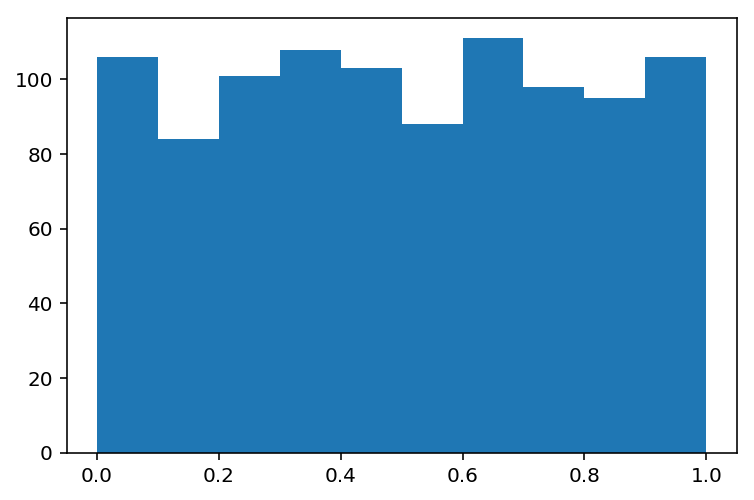

In [61]:
plt.hist(nums)

In [62]:
nums2 = []
for i in range(1000):
    temp1 = random.random()
    temp2 = random.random()
    total = temp1 + temp2
    nums2.append(total)

(array([  16.,   55.,  105.,  128.,  168.,  190.,  136.,   92.,   73.,   37.]),
 array([ 0.01354477,  0.20767075,  0.40179673,  0.5959227 ,  0.79004868,
         0.98417466,  1.17830064,  1.37242662,  1.56655259,  1.76067857,
         1.95480455]),
 <a list of 10 Patch objects>)

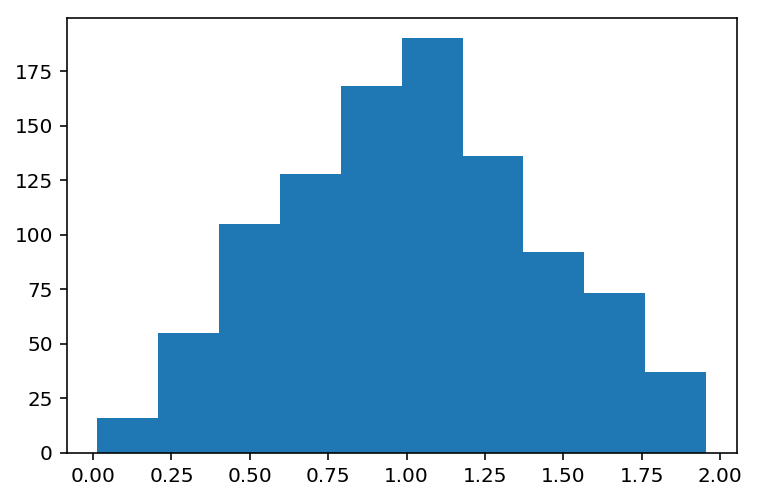

In [63]:
plt.hist(nums2)

In [64]:
xs = []
ys = []
for i in range(10000):
    temp1x = random.random()
    temp2x = random.random()
    temp3x = random.random()
    totalx = temp1x + temp2x + temp3x
    xs.append(totalx)
    temp1y = random.random()
    temp2y = random.random()
    temp3y = random.random()
    totaly = temp1y + temp2y + temp3y
    ys.append(totaly)

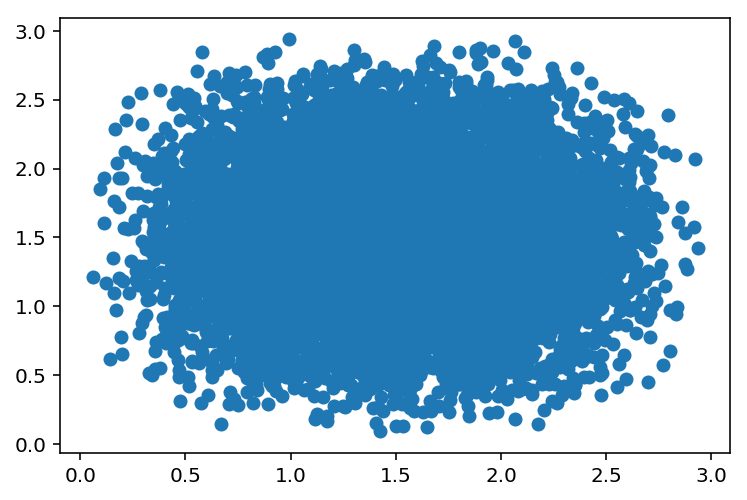

In [65]:
plt.scatter(xs, ys)

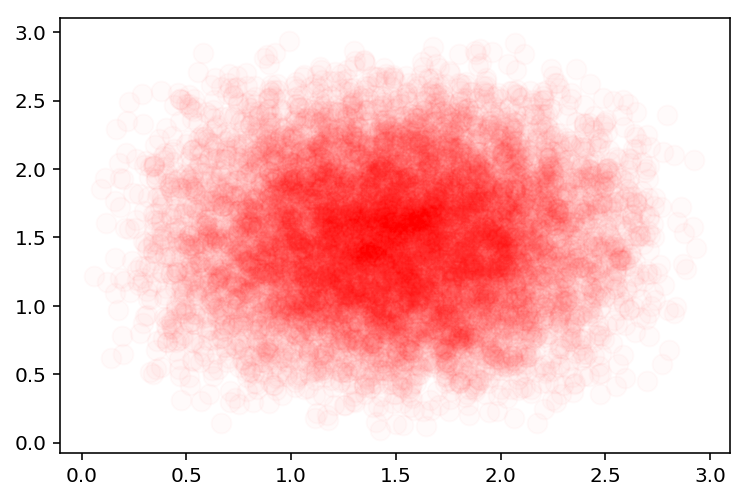

In [66]:

plt.scatter(xs, ys, s=100, c="r", alpha=0.02)

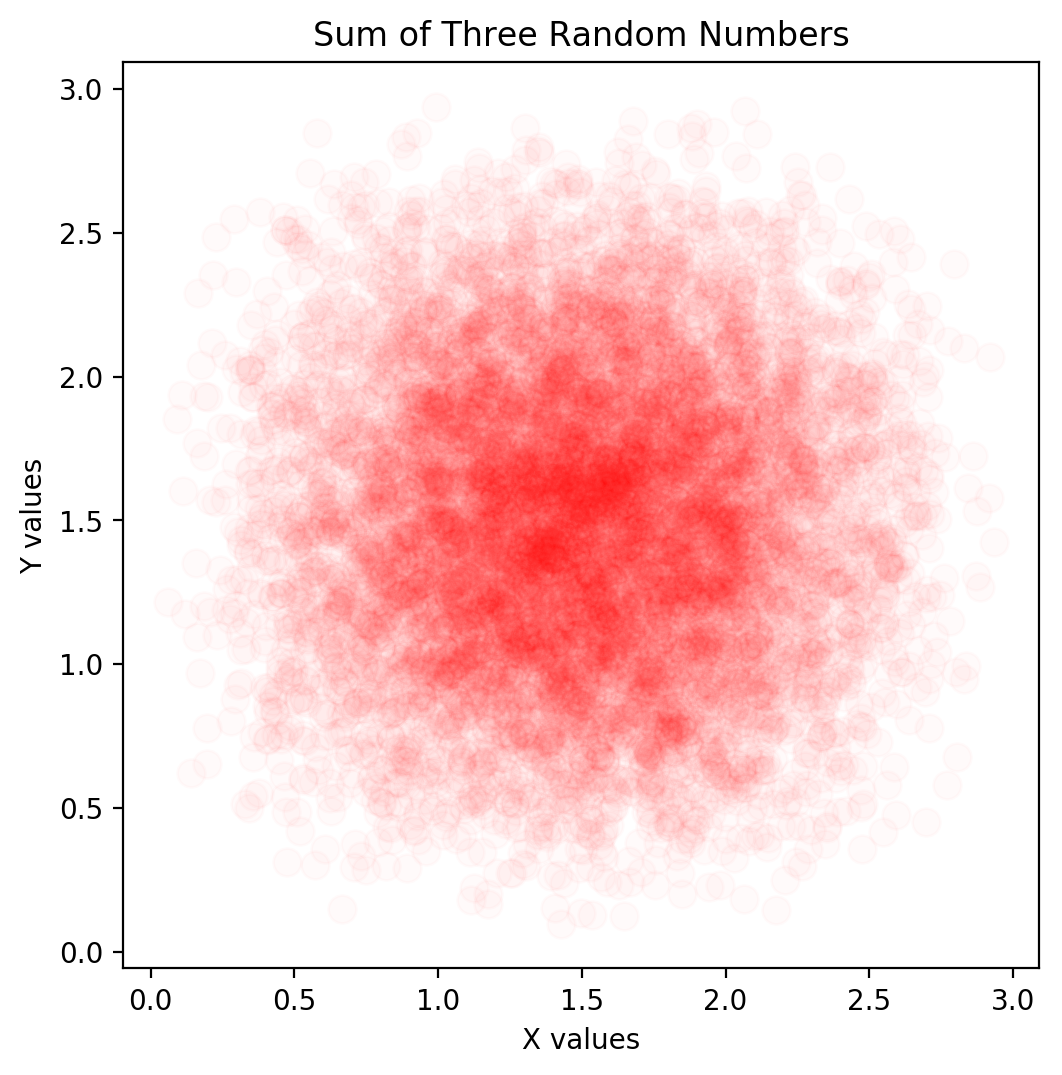

In [67]:
plt.figure(figsize=(6, 6), dpi=100)
plt.axes().set_aspect(1)
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Sum of Three Random Numbers")
plt.scatter(xs, ys, s=100, c="r", alpha=0.02)

In [68]:
def great_circle(x1, y1, x2, y2):
    lat1 = math.radians(x1)
    lat2 = math.radians(x2)
    lon1 = math.radians(y1)
    lon2 = math.radians(y2)
    d = math.acos((math.sin(lat1)*math.sin(lat2))+(math.cos(lat1)*math.cos(lat2)*math.cos(abs(lon1 - lon2))))
    D = math.degrees(d)*69
    return D
great_circle(35.0887, -92.4421, 34.7465, -92.2896)

25.138861294152708

In [69]:
great_circle(35.0887, -92.4421, 35.6895, 139.6917)

6497.1752798603075

In [70]:
def read_file(file):
    data = []
    f = open(file)
    lines = f.readlines()
    for i in range(len(lines)):
        if i != 0:
            data.append(lines[i].strip().split(","))
    f.close()
    return data

In [71]:
schools = read_file("Schools.csv")
print(schools[1])

['-92.454169059470274', '35.095976925127481', '8', '0', 'Ida Burns Elementary', 'Elementary', '1201 DONAGHEY AVENUE', '{CE5DFB8D-1936-47D5-98FE-E7A171FDBCDF}']


In [72]:
def read_sirens():
    sirens = read_file("Tornado_Sirens.csv")
    data = []
    for i in sirens:
        for j in i:
            if j == "Y":
                data.append(i)
    return data

sirens= read_sirens()
print(sirens[1])


['-92.45626368838704', '35.126945320125195', '8', '3', '3458 Roberts rd', '516', '"92° 27\' 22.549"" W"', '"35° 7\' 37.003"" N"', '8', 'Y', '', '', 'JLYON', '2015-11-12T22:27:00.000Z', '{3EF73BCC-8DB1-4B07-AD83-C494ED5683F3}']


In [73]:
def siren_list(sc):
    distances = []
    school = schools[sc]
    for p in sirens:
        d = great_circle(float(school[1]), float(school[0]), float(p[1]), float(p[0]))
        distances.append(d)
    return distances   

(array([ 2.,  3.,  3.,  4.,  0.,  4.,  2.,  3.,  1.,  1.]),
 array([ 0.40951514,  0.951003  ,  1.49249087,  2.03397873,  2.5754666 ,
         3.11695447,  3.65844233,  4.1999302 ,  4.74141806,  5.28290593,
         5.8243938 ]),
 <a list of 10 Patch objects>)

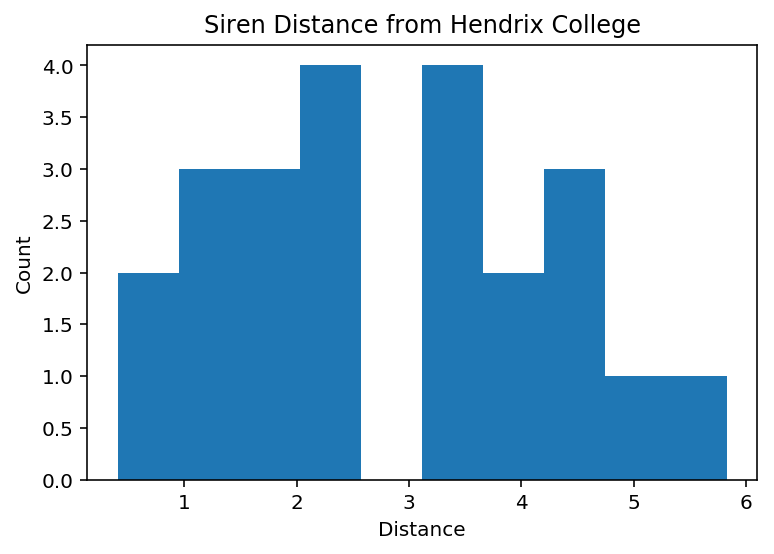

In [93]:
hendrix = siren_list(10)
plt.xlabel("Distance")
plt.ylabel("Count")
plt.title("Siren Distance from Hendrix College")
plt.hist(hendrix)

In [94]:

def count_miles(miles):
    hendrix = siren_list(10)
    count = 0
    for i in hendrix:
        if i <= miles:
            count += 1
    return count

print(count_miles(0.5))

1


In [95]:
print(count_miles(1))

2


(array([ 3.,  1.,  3.,  4.,  3.,  4.,  3.,  1.,  0.,  1.]),
 array([ 0.10535682,  0.20566004,  0.30596326,  0.40626649,  0.50656971,
         0.60687294,  0.70717616,  0.80747938,  0.90778261,  1.00808583,
         1.10838906]),
 <a list of 10 Patch objects>)

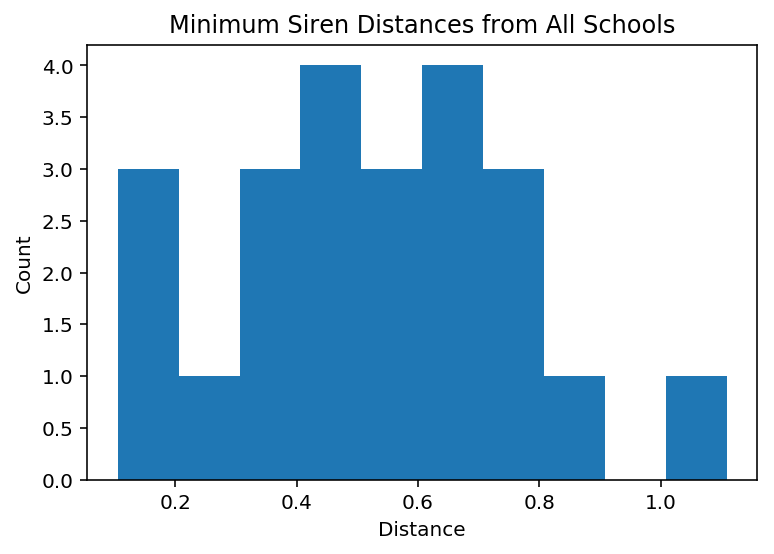

In [85]:
def closest_sirens():
    close_sirens = []
    school_index = {}
    for i in range(len(schools)):
        Dist_list_per_school = siren_list(i)
        smallest_dist_per_school = Dist_list_per_school[0]
        for j in Dist_list_per_school:
            if j < smallest_dist_per_school:
                smallest_dist_per_school = j
        close_sirens.append(smallest_dist_per_school)
        school_index[i] = smallest_dist_per_school
    return close_sirens, school_index

Minimum_dist, school_indices = closest_sirens()

plt.xlabel("Distance")
plt.ylabel("Count")
plt.title("Minimum Siren Distances from All Schools")
plt.hist(Minimum_dist)


In [96]:
def extrem_dist():
    Minimum_dist, school_indices = closest_sirens()
    nearest = school_indices[0]
    furthest = school_indices[0]
    for i in school_indices:
        if school_indices[i] < nearest:
            nearest = school_indices[i]

        if school_indices[i] > furthest:
            furthest = school_indices[i]

    for j in school_indices:
        if school_indices[j] == nearest:
            nearest_school_index = j
        if school_indices[j] == furthest:
            furthest_school_index = j
    return nearest_school_index, furthest_school_index

near, far = extrem_dist()
print(near)
print(far)

print("Nearestest school", schools[20])
print("Furthest school", schools[11])

20
11
Nearestest school ['-92.518607941992258', '35.090788148657069', '18', '0', 'Ruth Doyle Middle', 'Middle', '800 Padgett Rd', '{CB96F6CF-8CA6-4A4B-8BC4-77A714042FCB}']
Furthest school ['-92.49266337846683', '35.046924944440811', '28', '0', 'Carolyn Lewis Elementary', 'Elementary', '1805 OLD MILITARY RD', '{4F8AF88B-CE9F-4AB4-8769-7FF35C1C1A97}']


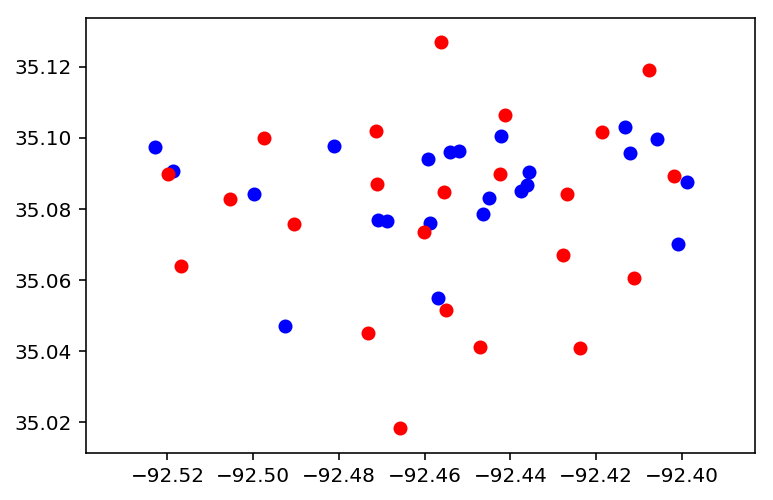

In [84]:
def coordinates(data):
    data_latitudes = []
    data_longitudes = []
    for i in data:
        data_latitudes.append(float(i[1]))
        data_longitudes.append(float(i[0]))

    return data_latitudes, data_longitudes

sch_lat, sch_long = coordinates(schools)
sir_lat, sir_long = coordinates(sirens)

plt.scatter(sch_long, sch_lat, c="b")
plt.scatter(sir_long, sir_lat, c="r")


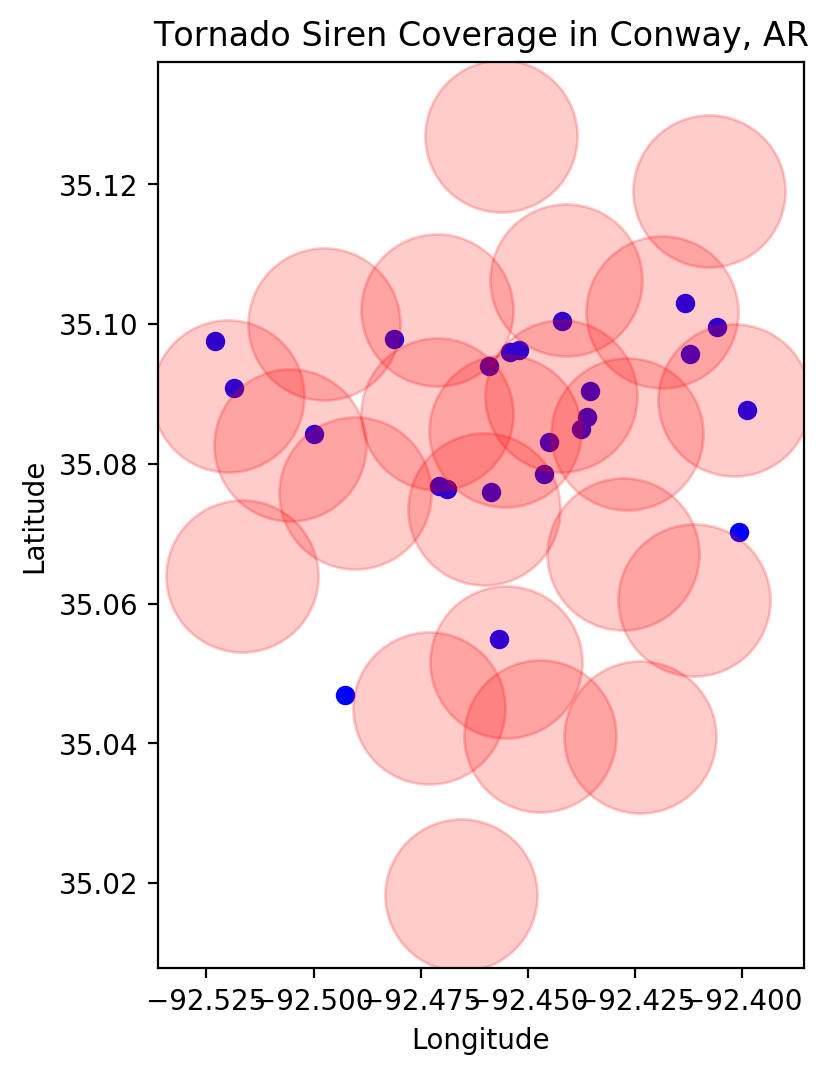

In [92]:
plt.figure(figsize=(6, 6), dpi=100)
plt.axes().set_aspect(1.63)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Tornado Siren Coverage in Conway, AR")
plt.scatter(sch_long, sch_lat, c = "b")
plt.scatter(sir_long, sir_lat, s = 3000, c = "r", alpha = 0.2)


/ext/anaconda3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(-92.4927,35.0469,'Carolyn Lewis Elementary')

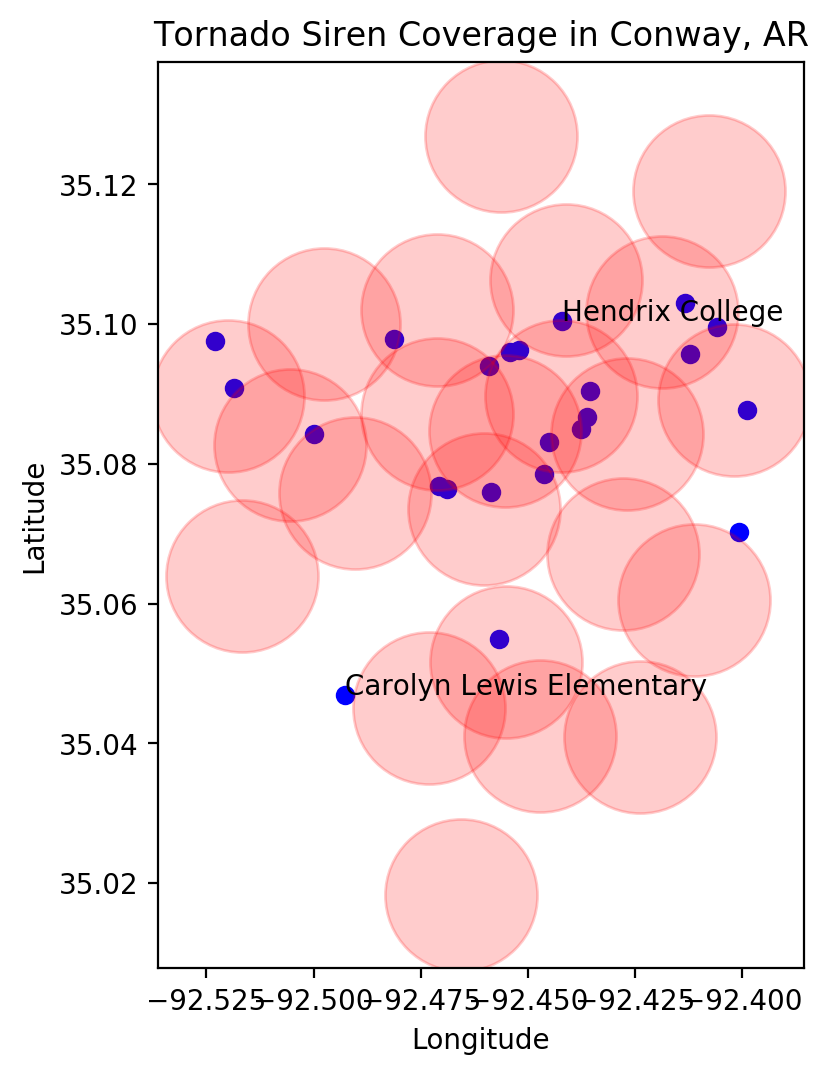

In [81]:
plt.figure(figsize=(6, 6), dpi=100)
plt.axes().set_aspect(1.63)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Tornado Siren Coverage in Conway, AR")
plt.scatter(sch_long, sch_lat, c="b")
plt.scatter(sir_long, sir_lat, s= 3000, c="r", alpha = 0.2)
plt.axes().annotate("Hendrix College", (float(schools[10][0]), float(schools[10][1])))
plt.axes().annotate("Carolyn Lewis Elementary", (float(schools[11][0]), float(schools[11][1])))